In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset,DataLoader
class diabetes_dataset(Dataset):
    def __init__(self,filepath):
        xy =np.loadtxt(filepath,delimiter=',',dtype=np.float32)
        self.len = xy.shape[0]
        self.x_data = torch.from_numpy(xy[:,:-1])
        self.y_data = torch.from_numpy(xy[:,[-1]])

    def __getitem__(self, index):
        return self.x_data[index],self.y_data[index]

    def __len__(self):
        return self.len

dataset = diabetes_dataset('D:/code/datasets/diabetes.csv.gz')
train_dataloader =DataLoader(dataset=dataset,
                            batch_size=32,
                            shuffle=True,
                            num_workers=0)

In [73]:
# 模型

class diabetes_model(torch.nn.Module):
    def __init__(self):
        super(diabetes_model,self).__init__()
        self.linear1 = torch.nn.Linear(8,6)
        self.linear2 = torch.nn.Linear(6,4)
        self.linear3 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self,x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
        return x

model = diabetes_model()

In [74]:
# 损失函数和优化器
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

In [ ]:
if __name__ == '__main__':
    loss_list =[]
    sum_loss = 0
    for epoch in range(1000):
        for i,(inputs,labels) in enumerate(train_dataloader,0):
            y_pred = model(inputs)
            loss = criterion(y_pred,labels)
            print(epoch,i,loss.item())
            sum_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()

            optimizer.step()

        loss_list.append(sum_loss/23)
        sum_loss = 0

RuntimeError: DataLoader worker (pid(s) 23200, 2276) exited unexpectedly

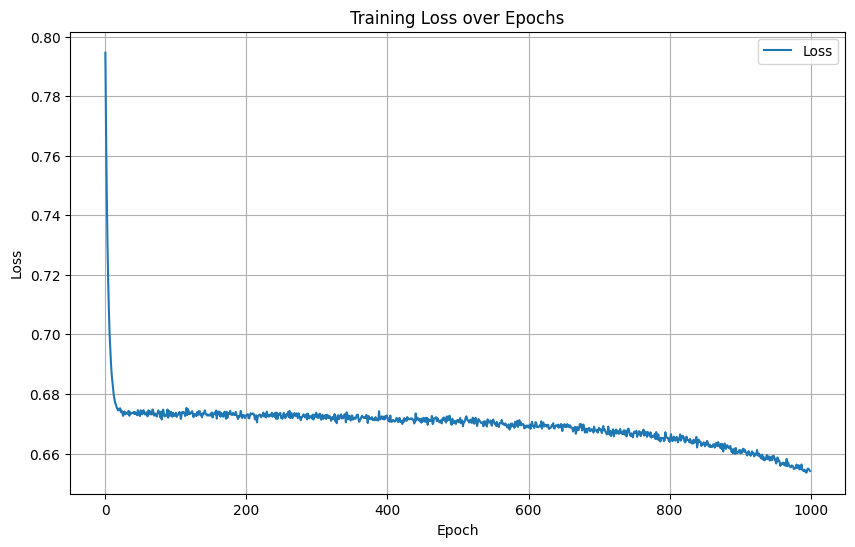

In [ ]:
import matplotlib.pyplot as plt

# 假设 loss_list 是在训练过程中记录的损失值列表

# 绘制损失变化图
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_list)), loss_list, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid()
plt.show()

